# Feature selection with Random Forest Classifier

25-10-2023

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

sklearn.set_config(transform_output="pandas")

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin


class LibraryLengthNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Normalise the gene counts to the library size
        X = X.apply(lambda x: (x / (x.sum() if x.sum() != 0 else 1)) * 1000000)
        return X

In [72]:
file_name = "/home/t.afanasyeva/MATseq/notebooks/gene_counts_NN_55_training.csv"

data = pd.read_csv(file_name)

target = data["sample"]
data_features = data.drop(columns=["sample"])

In [73]:
sns.set_context(
    "paper",
    rc={
        "font.size": 12,
        "axes.titlesize": 8,
        "axes.labelsize": 12,
        "figure.figsize": (240, 160),
    },
)


custom_palette_12 = [
    "#000000",
    "#8b4513",
    "#006400",
    "#000080",
    "#ff0000",
    "#ffa500",
    "#00ff7f",
    "#00ffff",
    "#ff00ff",
    "#eee8aa",
    "#6495ed",
    "#ff69b4",
]


custom_palette_24 = [
    "#000000",
    "#696969",
    "#8b4513",
    "#808000",
    "#3cb371",
    "#00008b",
    "#8b008b",
    "#ff4500",
    "#ffa500",
    "#ffff00",
    "#7fff00",
    "#00ff7f",
    "#4169e1",
    "#dc143c",
    "#00ffff",
    "#00bfff",
    "#0000ff",
    "#d8bfd8",
    "#ff00ff",
    "#db7093",
    "#f0e68c",
    "#ff1493",
    "#ffa07a",
    "#ee82ee",
]

In [74]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [76]:
data_pca = scaler.fit_transform(data_features)
data_pca = pca.fit_transform(data_pca)

/tmp/ipykernel_2850121/3635508526.py:1: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  scatter = sns.scatterplot(


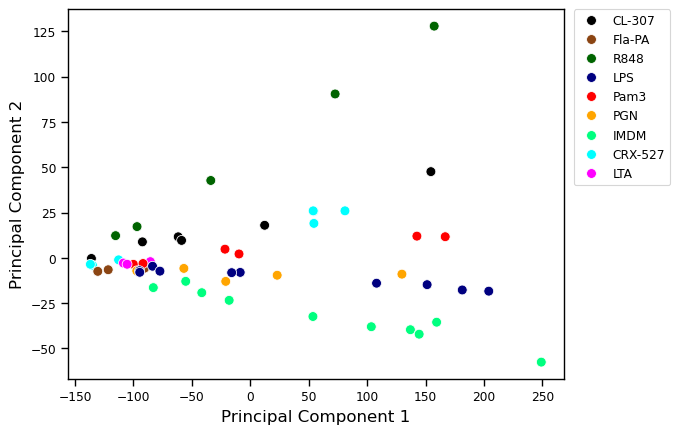

In [77]:
scatter = sns.scatterplot(
    x=data_pca.pca0,
    y=data_pca.pca1,
    hue=target,
    palette=custom_palette_12,
    s=50,
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(target)
X_train = data_features

In [79]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [139]:
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

In [135]:
important_featues = []

for feature in forest_importances.index:
    if forest_importances.loc[feature, 0] > 0.001:
        important_featues.append(feature)

In [136]:
len(important_featues)

340

In [144]:
forest_importances_subset = forest_importances.sort_values(ascending=False)[:50]
forest_importances_subset

CFB        0.006138
GJB2       0.005949
A4GALT     0.005514
SDS        0.005038
MMP10      0.005017
ERICH3     0.004439
USP18      0.004419
SAMD9      0.004260
KCNE3      0.003927
BCL2L14    0.003909
ISG15      0.003812
CXCL11     0.003798
CSF3       0.003674
EDN1       0.003650
FCGR1B     0.003635
GBP6       0.003604
SIAH3      0.003385
FCRL4      0.003343
GDF10      0.003326
RNASE1     0.003279
IL2RA      0.003218
IFNG       0.003204
CCL8       0.003186
TGM2       0.003155
MS4A14     0.003147
MERTK      0.003139
CCL20      0.003041
CTSD       0.002960
CCL3L1     0.002930
IFNA7      0.002907
TMEM52B    0.002902
CXCL1      0.002820
PLA2G4A    0.002795
ZBTB32     0.002783
IL6        0.002689
CXCL8      0.002671
CDH5       0.002640
IFI44      0.002524
GASK1B     0.002487
SHISA2     0.002470
F3         0.002446
AQP7       0.002444
PPARG      0.002443
LILRB1     0.002351
TNFSF10    0.002340
TNFAIP6    0.002338
NAB2       0.002331
CYB5R2     0.002307
HNMT       0.002213
CD14       0.002210


In [47]:
X_train = X_train[important_featues]

In [48]:
X_train_pca = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_pca)

/tmp/ipykernel_2850121/2992270388.py:1: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  scatter = sns.scatterplot(


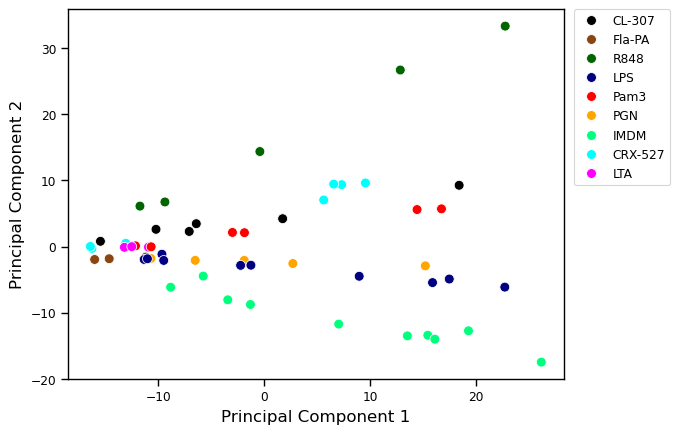

In [49]:
scatter = sns.scatterplot(
    x=X_train_pca.pca0,
    y=X_train_pca.pca1,
    palette=custom_palette_12,
    hue=target,
    s=50,
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

The samples are still being separated after removal of 82.9% of features. 